In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
rank = 30
matrix = np.random.randn(rank, rank)


In [51]:
def inverse_matrix(matrix):
    rank = np.shape(matrix)[0]
    print(rank)
    minor = np.zeros((rank, rank))
    grid = np.zeros((rank, rank))
    for i in range(rank):
        for j in range(rank):
            rows = [True] * rank
            rows[i] = False
            cols = [True] * rank
            cols[j] = False
            minor[i, j] = np.linalg.det(matrix[rows,:][:,cols])
            grid[i, j] = (-1)**(i + j)

    cofactor = minor * grid
    adjugate = cofactor.T / np.linalg.det(matrix)
    return adjugate

In [52]:
result_1 = inverse_matrix(matrix)
precision_1 = result_1 @ matrix

30


In [53]:
Q, R = np.linalg.qr(matrix)
result_2 = inverse_matrix(R) @ Q.T
precision_2  = result_2 @ matrix

30


Text(0.5, 1.0, 'Inverse error (30x30 matrix)')

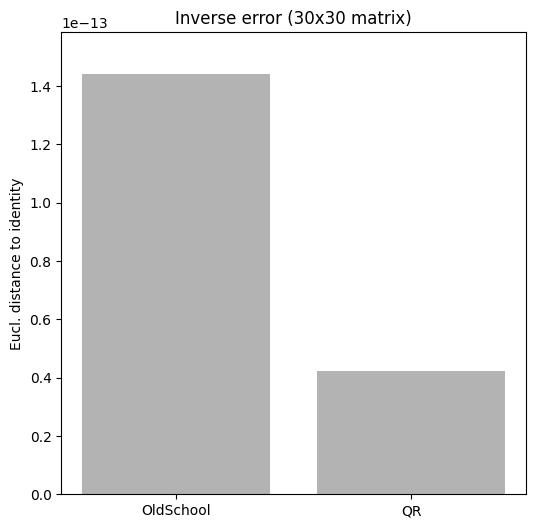

In [54]:
trueI = np.eye(rank)
sse = [0,0] # sse = sum of squared errors
sse[0] = np.sqrt(np.sum((precision_1 - trueI)**2))
sse[1] = np.sqrt(np.sum((precision_2 - trueI )**2))

plt.figure(figsize=(6,6))

plt.bar(range(2),sse,color=[.7,.7,.7])
plt.xticks(range(2), labels=['OldSchool', 'QR'])
plt.ylim([0, np.max(sse) * 1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({rank}x{rank} matrix)', ha = 'center')